In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
TABLE_DIR = "tables"

In [70]:
# https://data.cso.ie/table/E2004
population_data = pd.read_csv(os.path.join(TABLE_DIR, "PopulationandActualandPercentageChange2011to2016.csv"))
population_data

,Statistic,CensusYear,Sex,Aggregate Town or Rural Area,County and City,UNIT,VALUE
0,Population,2011,Both sexes,State,State,Number,4588252.0
1,Population,2011,Both sexes,State,Carlow,Number,54612.0
2,Population,2011,Both sexes,State,Dublin City,Number,527612.0
3,Population,2011,Both sexes,State,Dún Laoghaire-Rathdown,Number,206261.0
4,Population,2011,Both sexes,State,Fingal,Number,273991.0
...,...,...,...,...,...,...,...
1723,Percentage change since previous census,2016,Female,Aggregate Rural Area,Roscommon,%,0.4
1724,Percentage change since previous census,2016,Female,Aggregate Rural Area,Sligo,%,-3.4
1725,Percentage change since previous census,2016,Female,Aggregate Rural Area,Cavan,%,3.9
1726,Percentage change since previous census,2016,Female,Aggregate Rural Area,Donegal,%,0.1


In [71]:
COUNTIES = population_data["County and City"].loc[population_data["County and City"] != "State"].drop_duplicates()
COUNTIES

1                        Carlow
2                   Dublin City
3        Dún Laoghaire-Rathdown
4                        Fingal
5                  South Dublin
6                       Kildare
7                      Kilkenny
8                         Laois
9                      Longford
10                        Louth
11                        Meath
12                       Offaly
13                    Westmeath
14                      Wexford
15                      Wicklow
16                        Clare
17                    Cork City
18                  Cork County
19                        Kerry
20     Limerick City and County
21                    Tipperary
22    Waterford City and County
23                  Galway City
24                Galway County
25                      Leitrim
26                         Mayo
27                    Roscommon
28                        Sligo
29                        Cavan
30                      Donegal
31                     Monaghan
Name: Co

In [101]:
population_by_county_2011 = population_data.iloc[1:32].loc[(population_data["Statistic"] == "Population") & (population_data["Sex"] == "Both sexes") & (population_data["CensusYear"] == 2011)]

In [102]:
population_by_county_2016 = population_data.iloc[289:320].loc[(population_data["Statistic"] == "Population") & (population_data["Sex"] == "Both sexes") & (population_data["CensusYear"] == 2016)]

<AxesSubplot:xlabel='County and City'>

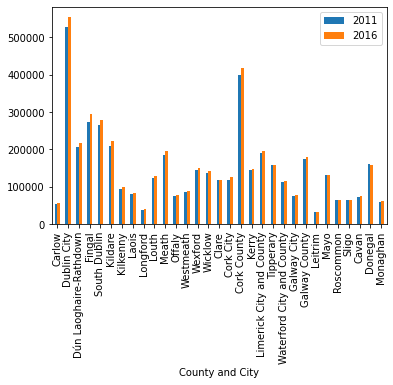

In [103]:
pd.DataFrame([population_by_county_2011["VALUE"].tolist(), population_by_county_2016["VALUE"].tolist()], columns=COUNTIES).transpose().rename(columns={0: 2011, 1: "2016"}).plot.bar()